# MLL774/ENG613 Workshop: Sentiment Analysis in R

Thursday, March 23, 2023 (5:00 to 7:45pm) 

This is a hands-on workshop on textual analysis methods and applications for Digital Humanities using the programming language R and the [tidyverse](https://www.tidyverse.org). More specifically, we will learn how to conduct frequency analysis and sentiment analysis in R.

The workshop will be split into 4 sections with a 15 minute break in-between the third and fourth section. The sections get 
incrementally more advanced, building on concepts and methods from the previous sections.

Instructor:

- Jerry Bonnell, <a href="mailto:j.bonnell@miami.edu">j.bonnell@miami.edu</a>, University of Miami, Department of Computer Science


__IMPORTANT__ Feel free to make any changes to this notebook. However, in order to keep any changes that you make, __please first make a copy of this notebook__ to your Google Drive. This can be done by navigating to `File > Save a copy in Drive`.  

### Overview

Here is an outline of what you will learn in this workshop: 

#### 1. Retrieving text with the `gutenbergr` package (10 mins)

This unit will give a brief introduction to retrieving texts from the Project Gutenberg
repository and how to load them into an R environment. Concepts needed to understand how 
textual data is represented in R will also be explained. We will choose select works
from Herman Melville's oeuvre as an example corpus to play with and participants will
have an opportunity to download their own texts as well.  

- 0:00 - 0:05 Set up and introduction to tidyverse and workshop packages
- 0:05 - 0:10 The `gutenbergr` package and how to query and download text as a tibble

#### 2. Understanding the "tidy text" format (35 mins)

This unit will motivate and introduce the "tidy text" format as a 
principled way for managing and transforming textual data effectively. It will
also show how tidy text principles can be applied to tidying an example corpus 
downloaded from Project Gutenberg. 

- 0:00 - 0:05 Why bother making text "tidy"? 
- 0:05 - 0:10 Tokens and tokenization: the basic meaningful unit in text analysis
- 0:10 - 0:15 __[Exercise]__ Accessing tokens in an example sentence
- 0:15 - 0:20 Example: Transforming *Moby Dick* to tidy text
- 0:20 - 0:25 Stopwords
- 0:25 - 0:30 Transformation to and from non-tidy forms
- 0:30 - 0:35 __[Exercise]__ From tidy text to document-feature matrix


#### 3. Frequency analysis with "tidy text" principles (40 mins)

This unit will focus on how to accomplish a frequency analysis task using 
tidy text principles, with the help of plots and visualizations that are 
commonly used when analyzing the data this way. 

- 0:00 - 0:10 Exploring a "tidy pipeline" for a corpus of Melville prose
- 0:10 - 0:20 Visualizing popular words with `ggplot2`
- 0:20 - 0:25 __[Exercise]__ Tweaking a visualization  
- 0:25 - 0:40 Just how influential was *Moby Dick*’s vocabulary?

#### 4. Break: 15 minutes 

#### 5. Sentiment analysis with "tidy text" principles (65 mins)

This unit will introduce a popular advanced text mining technique known as 
sentiment analysis. We will learn how to approach sentiment using tidy 
text principles and explore this through the Melville corpus developed
earlier in the workshop. 

- 0:00 - 0:10 Introduction and sentiment lexicons 
- 0:10 - 0:15 Mining sentiment via an inner join operation 
- 0:15 - 0:20 __[Exercise]__ Mining negative sentiment in a single text 
- 0:20 - 0:25 How does sentiment change throughout a novel? 
- 0:25 - 0:30 __[Exercise]__ Playing with different segment sizes 
- 0:30 - 0:35 Visualizing words with high sentiment contribution
- 0:30 - 0:35 Word cloud visualizations 
- 0:35 - 0:40 __[Exercise]__ Tweaking visualizations
- 0:40 - 0:55 Limitations: Sentiment lexicons and negated text 
- 0:55 - 0:65 Wrap-up/Q&A

## 0. Setting up 

Before we get started, let's go ahead and set up our notebook. Fortunately, Google Collab already comes baked-in with most of the important packages we will be using, e.g., the `tidyverse`. The following cell installs the remaining packages that we need.

__Note:__ This cell should take around ~5 minutes to finish running. When it is done, you will see a green ✅ to the left of this cell. Then proceed on to the next cell. 

In [1]:
install.packages(c("tidytext", "gutenbergr", "wordcloud", 
                   "reshape2", "tm", "textdata", "quanteda"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Let us now import the R packages that we will be using throughout the workshop.

In [2]:
options(repr.matrix.max.cols=20, repr.matrix.max.rows=15)
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 160)

library(tidyverse)
library(tidytext)
library(gutenbergr)
library(wordcloud)
library(reshape2)

tns <- getNamespace("textdata")
assignInNamespace(x = "printer", value = function(...) 1, ns = tns)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: RColorBrewer


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




#### What are these libraries?

<center>
<table><tr>
<td> <img src="https://raw.githubusercontent.com/jerrybonnell/ds4everyone/master/images/hex-tidyverse.png" width="170"/> </td>
<td> <img src="https://raw.githubusercontent.com/juliasilge/tidytext/master/man/figures/tidytext.png" width="170"/> </td>
<td> <img src="https://docs.ropensci.org/gutenbergr/hexlogo.png" width="180"/></td>
</tr></table>
</center>

1. `tidyverse`: An opinionated collection of R packages designed for data science, each having to do with data processing, transformation, and visualization. All packages share a core underlying design philosophy. The main packages we will see from here are `tibble`, for tabular representation of data, and `ggplot2`, for an easy-to-understand and consistent methodology for doing data visualization. 
2. `tidytext`: This package brings "tidy principles" to text so that text mining tasks are easier to do, more effective, and consistent with other tools already in wide use, e.g.,  members of the `tidyverse` like `dplyr`, `tibble`, and `ggplot2`.  
3. `gutenbergr`: A package that provides a useful querying tool for searching and downloading public domain works from the [Project Gutenberg](http://www.gutenberg.org/) collection.
4. `wordcloud` and `reshape2`: These are smaller packages we will be using when looking at sentiment analysis. 

We will be working with a few sample texts using the `gutenbergr` package. 

## 1. Text retrieval with `gutenbergr`

For the first part of this session we will use a corpus of Herman Melville’s prose as a data source for exploring tidy text principles and conducting text mining tasks. We will collect four texts from the Project Gutenberg repository for this part of the workshop: *Moby Dick*, *Bartleby, the Scrivener: A Story of Wall-Street*, *White Jacket*, and *Typee: A Romance of the South Seas*.

The `gutenbergr` package makes text querying and retrieval fairly straightforward. For instance, we can look up all texts available in the repository that have been authored by Melville. 

In [3]:
gutenberg_works(author == "Melville, Herman")

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
15,"Moby-Dick; or, The Whale","Melville, Herman",9,en,Best Books Ever Listings/Adventure,Public domain in the USA.,TRUE
1900,Typee: A Romance of the South Seas,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
2489,"Moby Dick; Or, The Whale","Melville, Herman",9,en,Best Books Ever Listings,Public domain in the USA.,TRUE
2694,I and My Chimney,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
4045,Omoo: Adventures in the South Seas,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
8118,Redburn. His First Voyage Being the Sailor Boy Confessions and Reminiscences of the Son-Of-A-Gentleman in the Merchant Navy,"Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
10712,"White Jacket; Or, The World on a Man-of-War","Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
11231,"Bartleby, the Scrivener: A Story of Wall-Street","Melville, Herman",9,en,NA,Public domain in the USA.,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


The results are returned in a format known as a *tibble*, which gives a tabular representation of the data. Tibbles are a modern take on the R *data frame*, which you may already be familiar with. From this returned tibble, we can immediately identify the Gutenberg IDs (in the column `gutenberg_id`) corresponding to the desired texts we wish to download: `11231`, `15`, `10712`, and `1900`. 

We can actually retrieve all these texts at once using the `gutenberg_download()` function and specifying an array of these values (technically known as a *vector* in R):

In [4]:
gutenberg_ids <- c(11231, 15, 10712, 1900)
melville <- gutenberg_download(gutenberg_ids, 
  mirror = "http://mirrors.xmission.com/gutenberg/")
melville

gutenberg_id,text
<int>,<chr>
15,Moby-Dick
15,
15,"or,"
15,
15,THE WHALE.
15,
15,by Herman Melville
15,
⋮,⋮


The results are returned in the form of a tibble with one row per each line of the text. We assign this tibble to the name `melville`, so that we may refer to it again later to view the contents of this table. 


Since ID numbers are cryptic to understand and it is not immediately clear that numbers like `15` actually mean *Moby Dick*, let us recode each of the values according to their proper title. We will add a new column called `title` to this tibble `melville` that contains the corresponding titles.  

__Technical note:__ Tibble manipulation functions like `recode()`, `filter()`, `mutate()`, `arrange()` come from the `tidyverse` package `dplyr` which provides a [grammar of data manipulation](https://dplyr.tidyverse.org) for dealing with datasets. We often refer to these as `dplyr` *verbs* that act upon some *subject*, usually a dataset. 

In [5]:
melville <- melville |>
  mutate(title = recode(gutenberg_id, 
                               '15' = 'Moby Dick', 
                               '11231' = 'Bartleby, the Scrivener',
                               '10712' = 'White Jacket',
                               '1900' = 'Typee: A Romance of the South Seas'))
melville

gutenberg_id,text,title
<int>,<chr>,<chr>
15,Moby-Dick,Moby Dick
15,,Moby Dick
15,"or,",Moby Dick
15,,Moby Dick
15,THE WHALE.,Moby Dick
15,,Moby Dick
15,by Herman Melville,Moby Dick
15,,Moby Dick
⋮,⋮,⋮


## 2. In pursuit of "tidy text" 

A goal of this workshop is learning how to do textual analysis using "tidy data" principles. This means that a prerequisite to conducting any kind of textual analysis is to first preprocess, or *tidy*, the text. 

### 2.1 Why bother making text "tidy"? Why not just leave it as-is? 

Hadley Wickham, a distinguished data scientist and main contributor to the `tidyverse`, offers the following amendment to the famous Leo Tolstoy quote in his seminal work [Tidy Data](http://www.jstatsoft.org/v59/i10/paper): 

> "**Happy families** are all alike; every **unhappy family** is unhappy in its own way." –– Leo Tolstoy

> "**Tidy datasets** are all alike, but every **messy dataset** is messy in its own way." –– Hadley Wickham

Tidy data gives a consistent way for organizing data in R. It requires investing some upfront work, but bringing your data into "tidyness" (or, perhaps better said, the "tidyverse"?) means much less time munging or "wrangling" your data from one representation to another to get on with the analysis. This translates to less time preprocessing and more time for analysis.  

Put more simply, tidy data equals consistency:

<center>
<img src="https://raw.githubusercontent.com/allisonhorst/stats-illustrations/master/rstats-artwork/tidydata_3.jpg" width="700"/>
</center>

__Image credits__: "Illustrations from the Openscapes blog Tidy Data for reproducibility, efficiency, and collaboration" by Julia Lowndes and Allison Horst. 

Tidy data principles do well when extended to *textual analysis* as they can make text mining tasks easier to accomplish. Treating text as a table of individual words allows us to manipulate, summarize, and visualize text characteristics with ease.  


### 2.2 Tokens and tokenization: the basic meaningful unit in text analysis 

The basic meaningful unit in text analysis is the *token*. It is usually a word, but it can be more or less granular depending on the context, e.g., "sentence-like" units or vowel units. For the purposes of this workshop, the token will always represent the word unit.

*Tokenization* is the process of splitting text into tokens. For instance, here are a few sentences from *Moby Dick*: 

In [6]:
some_moby_sentences <- c(
  "Call me Ishmael.", 
  "Some years ago--never mind how long precisely--having little or no money in my purse,",
  "and nothing particular to interest me on shore,",
  "I thought I would sail about a little and see the watery part of the world.")

We are fortunate that tokens in standard written English are delimited by white space `" "`. So tokenization of these sentences can be easy to accomplish using a string manipulation function like `str_split()` from the `stringr` package.

In [9]:
tokenized <- some_moby_sentences |>
  str_split(" ")
tokenized

[[1]]
[1] "Call"     "me"       "Ishmael."

[[2]]
 [1] "Some"              "years"             "ago--never"       
 [4] "mind"              "how"               "long"             
 [7] "precisely--having" "little"            "or"               
[10] "no"                "money"             "in"               
[13] "my"                "purse,"           

[[3]]
[1] "and"        "nothing"    "particular" "to"         "interest"  
[6] "me"         "on"         "shore,"    

[[4]]
 [1] "I"       "thought" "I"       "would"   "sail"    "about"   "a"      
 [8] "little"  "and"     "see"     "the"     "watery"  "part"    "of"     
[15] "the"     "world."

By the way, the `|>` operator used above is known as the "pipe" operator. It can be read as saying "and then...". Thus, the above code could be read as: "take the string in the name `some_moby_sentences` *and then* split it by the white space character." Formally, `x |> f(y)` is equivalent to saying `f(x, y)`. 

Each sentence in `tokenized` has been split into tokens, and we can access any of them using list and vector R notation.

In [10]:
tokenized[[1]][3]

[1] "Ishmael."

__Exercise:__ Can you figure out how we could reference the token "money" in the second sentence? 

In [ ]:
# Your code goes here!

### 2.3 Tidying *Moby Dick*

To explore these tidy principles in greater detail, let us return to our corpus of Melville prose. For now, we will concentrate our efforts on just a single work: *Moby Dick*. So we will collect all rows from `melville` that correspond to this title. 

In [11]:
moby_dick <- melville |>
  filter(title == "Moby Dick")

The name `moby_dick` refers to the table containing the text for *Moby Dick*. To better understand this table, let us examine the text from line numbers 5,000 to 5,150.  

In [12]:
moby_dick |>
  slice(5000:5150)

gutenberg_id,text,title
<int>,<chr>,<chr>
15,"hammered leaves of finest gold, the stumped and paupered arm of old",Moby Dick
15,Cervantes; Thou who didst pick up Andrew Jackson from the pebbles; who,Moby Dick
15,didst hurl him upon a war-horse; who didst thunder him higher than a,Moby Dick
15,"throne! Thou who, in all Thy mighty, earthly marchings, ever cullest",Moby Dick
15,"Thy selectest champions from the kingly commons; bear me out in it, O",Moby Dick
15,God!,Moby Dick
15,,Moby Dick
15,,Moby Dick
⋮,⋮,⋮


Text that is tidy is a *table with one token per row*. Assuming that the text is given to us in tabular form (like `moby_dick`), we can break text into tokens and transform it to a tidy structure in one go using the function `unnest_tokens()` from the `tidytext` package.

In [13]:
tidy_moby_dick <- moby_dick |>
  unnest_tokens(word, text) # create a new variable called 'word'
tidy_moby_dick

gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,or
15,Moby Dick,the
15,Moby Dick,whale
15,Moby Dick,by
15,Moby Dick,herman
15,Moby Dick,melville
⋮,⋮,⋮


How about we try applying the same `slice()` function, but now on `tidy_moby_dick` instead?


In [14]:
tidy_moby_dick |>
  slice(5000:5150)

gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,his
15,Moby Dick,meadow
15,Moby Dick,and
15,Moby Dick,there
15,Moby Dick,sleep
15,Moby Dick,his
15,Moby Dick,cattle
15,Moby Dick,and
⋮,⋮,⋮


Note how each row of this table contains just one token, unlike `moby_dick` which gave a row for each line. When text is in this form, we say it follows a *one-token-per-row structure* and, therefore, is tidy.

### 2.4 Stopwords 

With our text ready in tidy form, we can start answering some basic questions about the text. For example: *what are the most popular words in Moby Dick?* 

We can answer this using the function `count()` from the tibble manipulation package `dplyr`:


In [15]:
tidy_moby_dick |>
  count(word, sort = TRUE)

word,n
<chr>,<int>
the,14521
of,6611
and,6445
a,4717
to,4628
in,4175
that,2974
his,2529
⋮,⋮


The result is profoundly disappointing! Top-ranking words that appear are so obvious and do not clue us as to the characteristics of the language used in *Moby Dick*. If we were not told otherwise, we could be convinced that this is also the top words list from any other text. As it stands, this list obstructs from any kind of analysis being made.

These common words (e.g., "this", "his", "that", "in") that appear in almost every written English sentence are known as stopwords. It is a typical tidying step in text analysis studies to remove said stopwords before marching forward with the analysis.

The tibble `stop_words` is a tibble provided by `tidytext` that contains a list of English stopwords.


In [16]:
stop_words

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
⋮,⋮


Using the function `anti_join()`, we can filter out any rows from `tidy_moby_dick` that match with a stopword in the tibble `stop_words`.

<center>
<img width="40%" src="https://datasciencebox.org/course-materials/_slides/u2-d08-multi-df/img/anti-join.gif"/>
</center>

In [17]:
tidy_moby_dick_stopworded <- tidy_moby_dick |>
  anti_join(stop_words)
tidy_moby_dick_stopworded

Joining with `by = join_by(word)`


gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,whale
15,Moby Dick,herman
15,Moby Dick,melville
15,Moby Dick,contents
15,Moby Dick,etymology
15,Moby Dick,extracts
⋮,⋮,⋮


Observe how the total number of rows in this tibble has decreased dramatically when compared with `tidy_moby_dick`. Let us redo the most popular word list again.

In [18]:
tidy_moby_dick_stopworded |>
  count(word, sort = TRUE)

word,n
<chr>,<int>
whale,1105
sea,453
ship,440
ahab,438
ye,429
head,347
time,334
chapter,308
⋮,⋮


Much better! We can visualize the list using a bar plot in `ggplot2`.

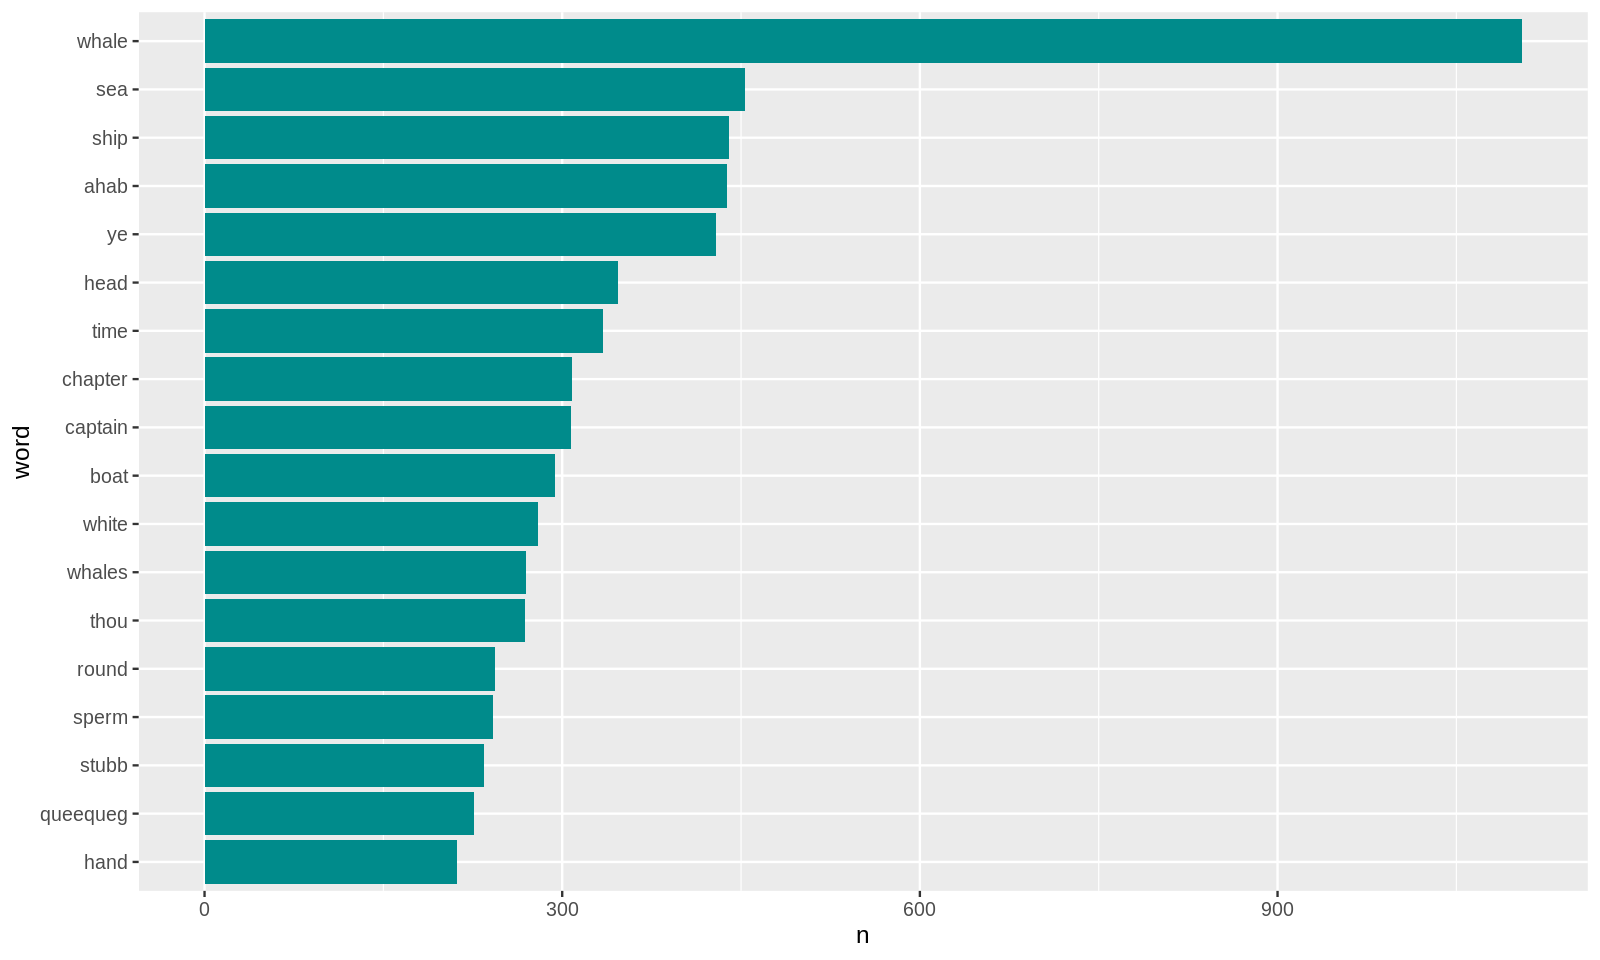

In [19]:
tidy_moby_dick_stopworded |>
  count(word, sort = TRUE) |>
  filter(n > 200) |>
  mutate(word = reorder(word, n)) |>
  ggplot(aes(x=n, y=word)) +
  geom_bar(stat="identity", fill = "darkcyan")

From this visualization, we can clearly see that the story talks a lot about whales, the sea, ships, 
and a character named "Ahab". Some participants may point out that "ye" should also be considered a stopword, which raises an important point about standard stopword lists: they do not do well with lexical variants. For this, a custom list should be specified or appended to the standard list.

Our visualization is also a first course in how tidy text plays nicely with members of the `tidyverse` like `ggplot2`. 

### 2.5 Transformation to and from non-tidy forms 

Before we turn to our first full-fledged text mining application, let us touch briefly on one more practical note about organizing your corpus as tidy text. 

Tidy text is useful in that it plays well with core tidyverse members like `ggplot2`, as we just saw earlier. However, the principles of tidy text should not be taken as license for labeling non-tidy text forms as without purpose. In fact, important text analysis modeling techniques like *topic modeling* will only accept text that is in a non-tidy form. The magic of tidy text, then, lies not in its elegance and transparent format, but in its ability to move fluidly between tidy and non-tidy forms. 


As an example, here is how we can convert tidy text to a format known as a *document term matrix* which is how topic modeling likes its input. Don’t worry if all that seems like nonsense jargon – the part you should care about is that we can convert tidy text to a document term matrix with __just one line of code__!

In [20]:
tidy_moby_dick_stopworded |>
  count(gutenberg_id, word)

gutenberg_id,word,n
<int>,<chr>,<int>
15,"1,000,000",1
15,10,2
15,"10,440",1
15,"10,800",2
15,"100,000",2
15,11,2
15,12,2
15,13,3
⋮,⋮,⋮


In [ ]:
tidy_moby_dick_stopworded |>
  count(gutenberg_id, word) |>
  cast_dtm(gutenberg_id, word, n)

<<DocumentTermMatrix (documents: 1, terms: 17260)>>
Non-/sparse entries: 17260/0
Sparsity           : 0%
Maximal term length: 20
Weighting          : term frequency (tf)

__Exercise:__ Another useful non-tidy text format is a *document-feature matrix*. In this form, the table is structured as one token per column, where the value given in the column is the frequency of the token. We can convert tidy text to a document-feature matrix using the function `cast_dfm()`. Can you complete the following code to convert the tidy tibble `moby_dick_words_with_counts` to a document-feature matrix? 

Try using the `|>` operator!

In [ ]:
# Your code here!

## 3. Frequency analysis

We are now ready to apply the tidy text principles we have learned to carry out a simple first study 
in text mining: *frequency analysis* (or, *word count analysis*). While looking at word counts may seem like a simple idea, it can be a helpful first step in exploring text data and can inform next steps in research.

We are also ready to return to our corpus of Melville prose we put together earlier in the workshop,
available in the name `melville`. 

### 3.1 Tidying `melville`

As we just saw, before any textual analysis can proceed, the corpus must be brought into tidy text. 
We can chain together the steps before and build a text analysis pipeline by connecting the steps using 
the `|>` operator. That is, we will:

* Convert the text to a *one-token-per-row* structure, 
* Filter stopwords from the text using the standard `stop_words` list, 
* __AND,__ enforce that all tokens that appear are strictly alphabetical and lowercase. 

The last step may or may not be helpful to include depending on the study. Because we are approaching these texts exclusively from the stance of distant reading, numerical tokens carry little inherent meaning. Technically, we would call said tokens *noisy* because, like stopwords, they also distort the possibility for analysis.

Now, the code: 


In [22]:
tidy_melville <- melville |>
  unnest_tokens(word, text) |>
  anti_join(stop_words) |>
  mutate(word = str_extract(word, "[a-z]+"))
tidy_melville

Joining with `by = join_by(word)`


gutenberg_id,title,word
<int>,<chr>,<chr>
15,Moby Dick,moby
15,Moby Dick,dick
15,Moby Dick,whale
15,Moby Dick,herman
15,Moby Dick,melville
15,Moby Dick,contents
15,Moby Dick,etymology
15,Moby Dick,extracts
⋮,⋮,⋮


As a quick check, let us perform a "word count" for each of the texts. 


In [25]:
tidy_melville |>
  group_by(title) |>
  count(word, sort = TRUE) |>
  summarize(num_words = sum(n)) |>
  arrange(desc(num_words))

title,num_words
<chr>,<int>
Moby Dick,86233
White Jacket,56449
Typee: A Romance of the South Seas,43060
"Bartleby, the Scrivener",5025


*Moby Dick* is a mammoth of a book (178 pages!) so it makes sense that it would rank highest in the 
list in terms of word count.

### 3.2 Visualizing popular words

Let us find the most popular words in each of the titles.

In [26]:
tidy_melville <- tidy_melville |>
  group_by(title) |>
  count(word, sort = TRUE) |>
  ungroup()
tidy_melville

title,word,n
<chr>,<chr>,<int>
Moby Dick,whale,1243
Moby Dick,ahab,520
Moby Dick,ship,520
White Jacket,war,481
Moby Dick,sea,454
Moby Dick,ye,439
White Jacket,captain,413
Moby Dick,head,348
⋮,⋮,⋮


This lends itself well to a bar geom in `ggplot`. We will select out around the 10 most popular, which correspond to words that occur over 250 times.

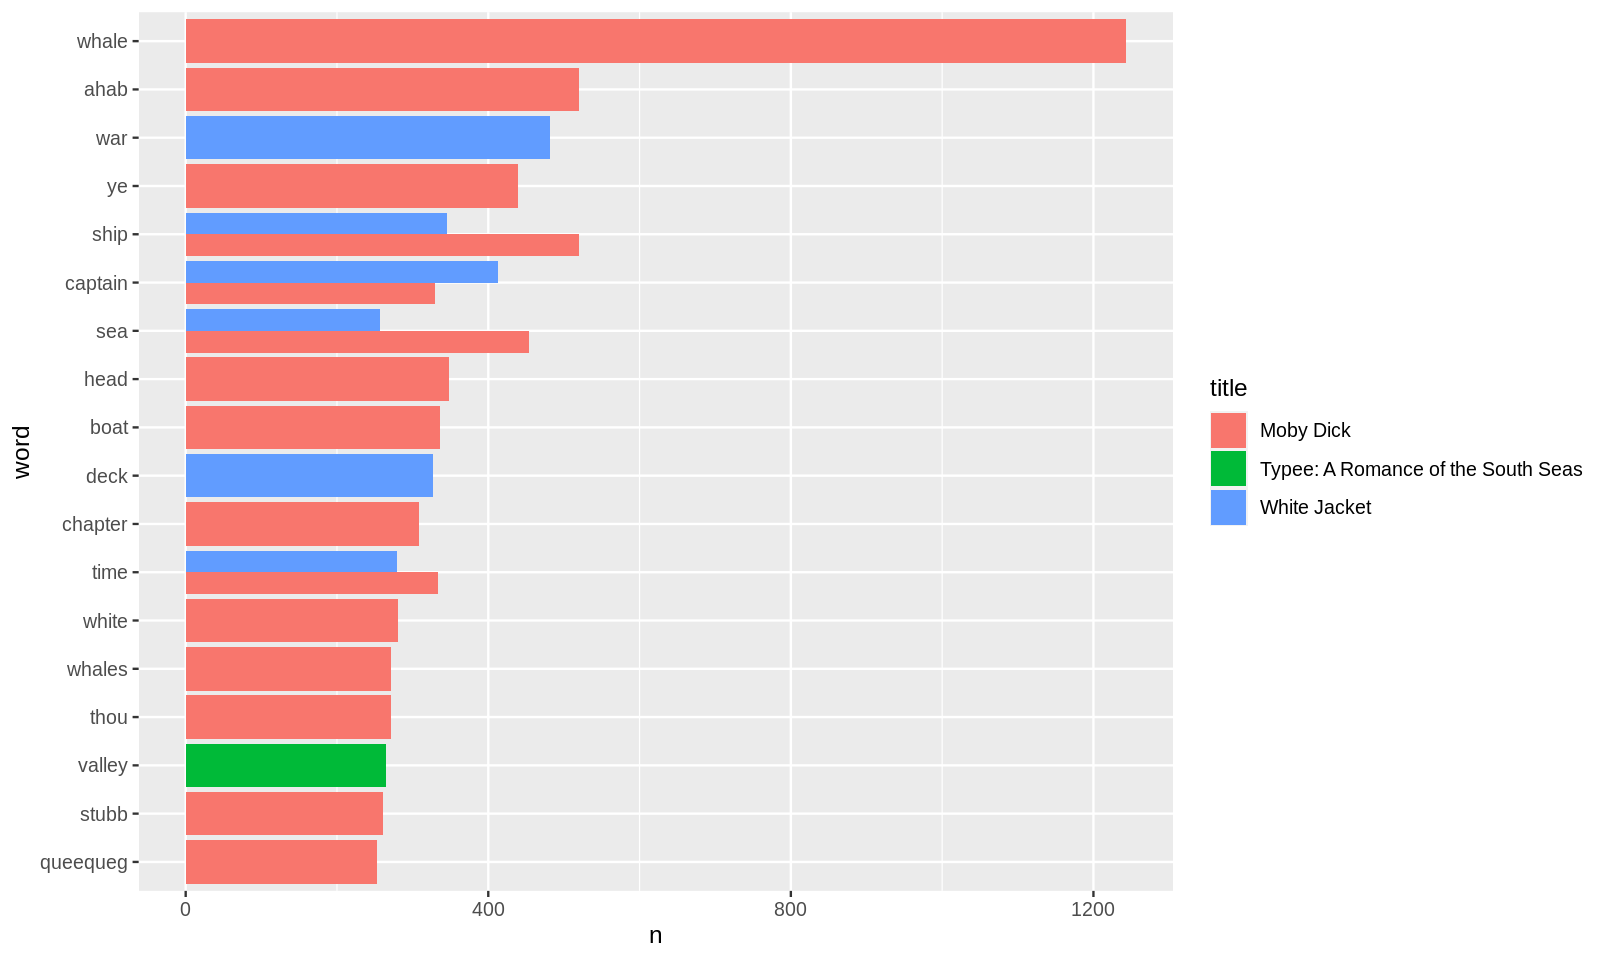

In [27]:
tidy_melville |>
  filter(n > 250) |>
  mutate(word = reorder(word, n)) |>
  ggplot(aes(x=n, y=word, fill=title)) +
  geom_bar(stat="identity", position="dodge")

Something is odd about this plot. These top words are mostly coming from *Moby Dick*! As we just saw,
*Moby Dick* is the largest title in our collection so any of its popular words would dominate the overall popular list of words in terms of word count.

Instead of looking at word counts, a better approach is to look at *word proportions*. Even though the word "whale" may have over 1200 occurrences, the proportion in which it appears may be much less when compared to other titles.

Let us add a new column containing these proportions in which a word occurs with respect to the total number of words in the corresponding text.


In [28]:
tidy_melville_with_proportion <- tidy_melville |>
  group_by(title) |>
  mutate(proportion = n / sum(n)) |>
  ungroup()
tidy_melville_with_proportion

title,word,n,proportion
<chr>,<chr>,<int>,<dbl>
Moby Dick,whale,1243,0.014414435
Moby Dick,ahab,520,0.006030174
Moby Dick,ship,520,0.006030174
White Jacket,war,481,0.008520966
Moby Dick,sea,454,0.005264806
Moby Dick,ye,439,0.005090858
White Jacket,captain,413,0.007316339
Moby Dick,head,348,0.004035578
⋮,⋮,⋮,⋮


Let us redo the plot.

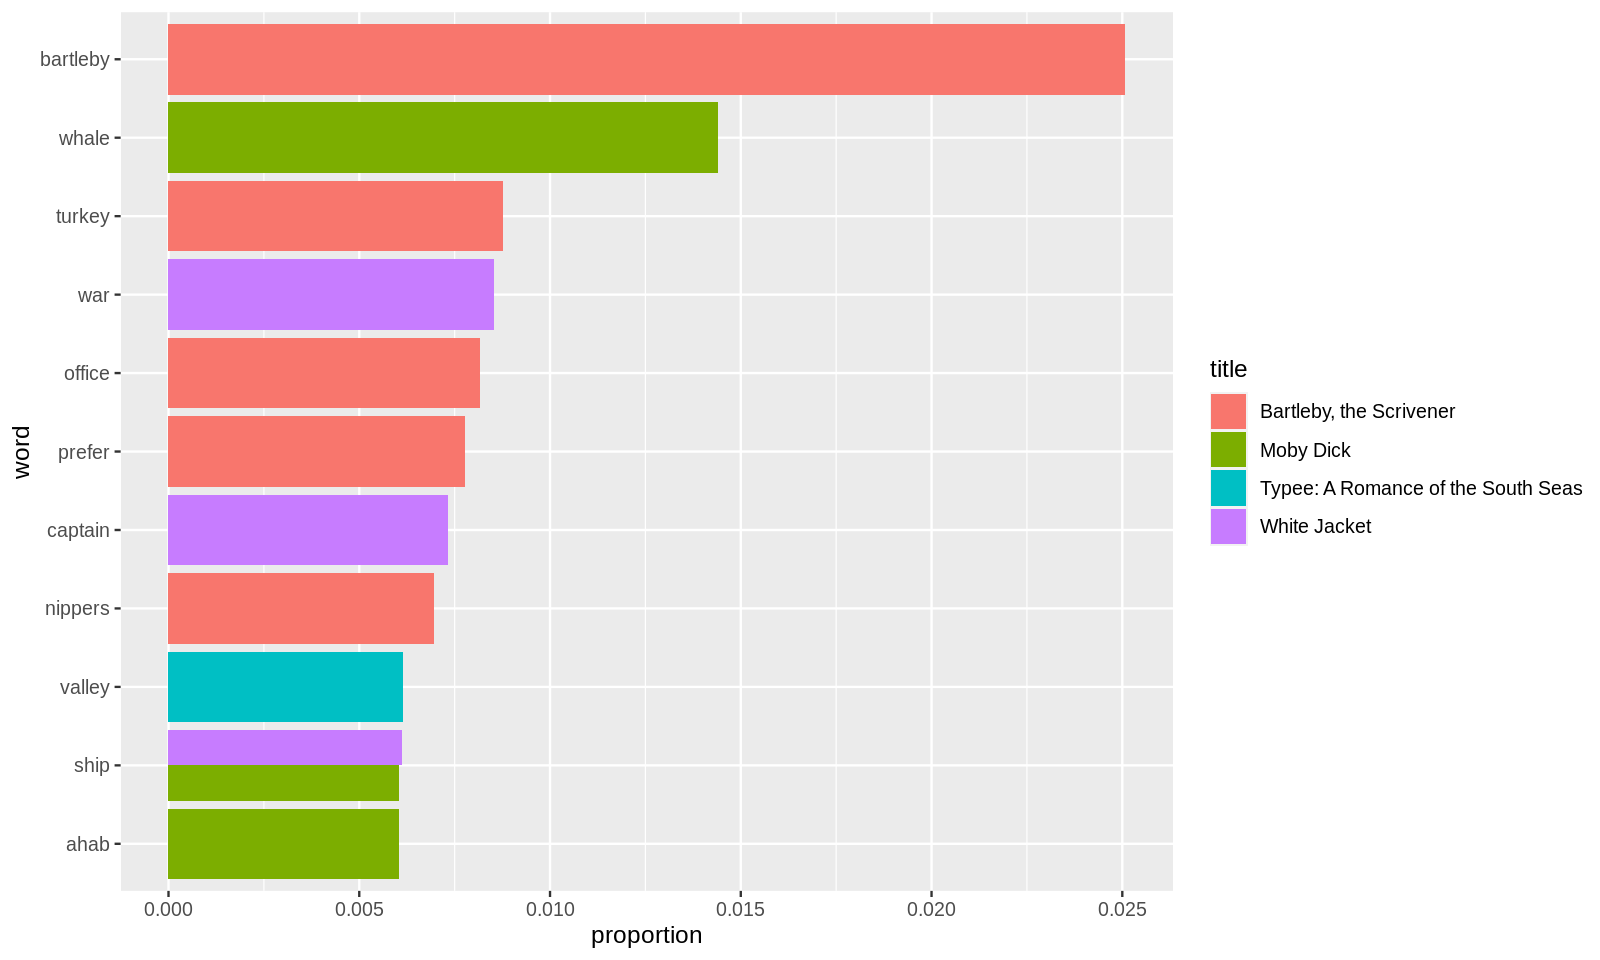

In [29]:
tidy_melville_with_proportion |>
  filter(proportion > 0.006) |>
  mutate(word = reorder(word, proportion)) |>
  ggplot() +
  geom_bar(aes(x=proportion, y=word, fill=title), 
           stat="identity", position = "dodge")

Interesting! In terms of proportions, we see that Melville uses the word "bartleby" much more in *Bartleby, the Scrivener* than he does "whale" in *Moby Dick*. Moreover, Moby Dick no longer dominates 
the popular words list. In fact, it turns out that *Bartleby, the Scrivener* contributes the most highest-ranking words from the collection.

__Exercise:__ Can you adjust the bar plot visualization so that it displays more top words?

In [ ]:
# Your code goes here!

### 3.3 Just how popular was *Moby Dick*’s vocabulary?

A possible follow-up question is whether the most popular words in *Moby Dick* also saw significant usage across other texts in the collection. That is, for the most popular words that appear in *Moby Dick*, how often do they occur in the other titles in terms of word proportions? This would suggest elements in those texts that are laced with some of the major thematic components in *Moby Dick*.

We first extract the top 10 words from *Moby Dick* to form a "popular words" list.

In [31]:
top_moby <- tidy_melville |>
  filter(title == "Moby Dick") |>
  arrange(desc(n)) |>
  slice(1:10) |>
  select(word)
top_moby

word
<chr>
whale
ahab
ship
sea
ye
head
boat
time
captain


We compute the word proportions with respect to each of the titles and then join the `top_moby` words 
list with `tidy_melville` to extract only the top Moby Dick words from the other three texts.

In [32]:
top_moby_words_other_texts <- tidy_melville |>
  group_by(title) |>
  mutate(proportion = n / sum(n)) |>
  inner_join(top_moby, by="word") |>
  ungroup()
top_moby_words_other_texts

title,word,n,proportion
<chr>,<chr>,<int>,<dbl>
Moby Dick,whale,1243,0.014414435
Moby Dick,ahab,520,0.006030174
Moby Dick,ship,520,0.006030174
Moby Dick,sea,454,0.005264806
Moby Dick,ye,439,0.005090858
White Jacket,captain,413,0.007316339
Moby Dick,head,348,0.004035578
White Jacket,ship,345,0.006111711
⋮,⋮,⋮,⋮


Now, the plot. Note that the factor in the `y` aesthetic mapping allows us to preserve the order of popular words in `top_moby` so that we can observe an upward trend in the *Moby Dick* bar heights.

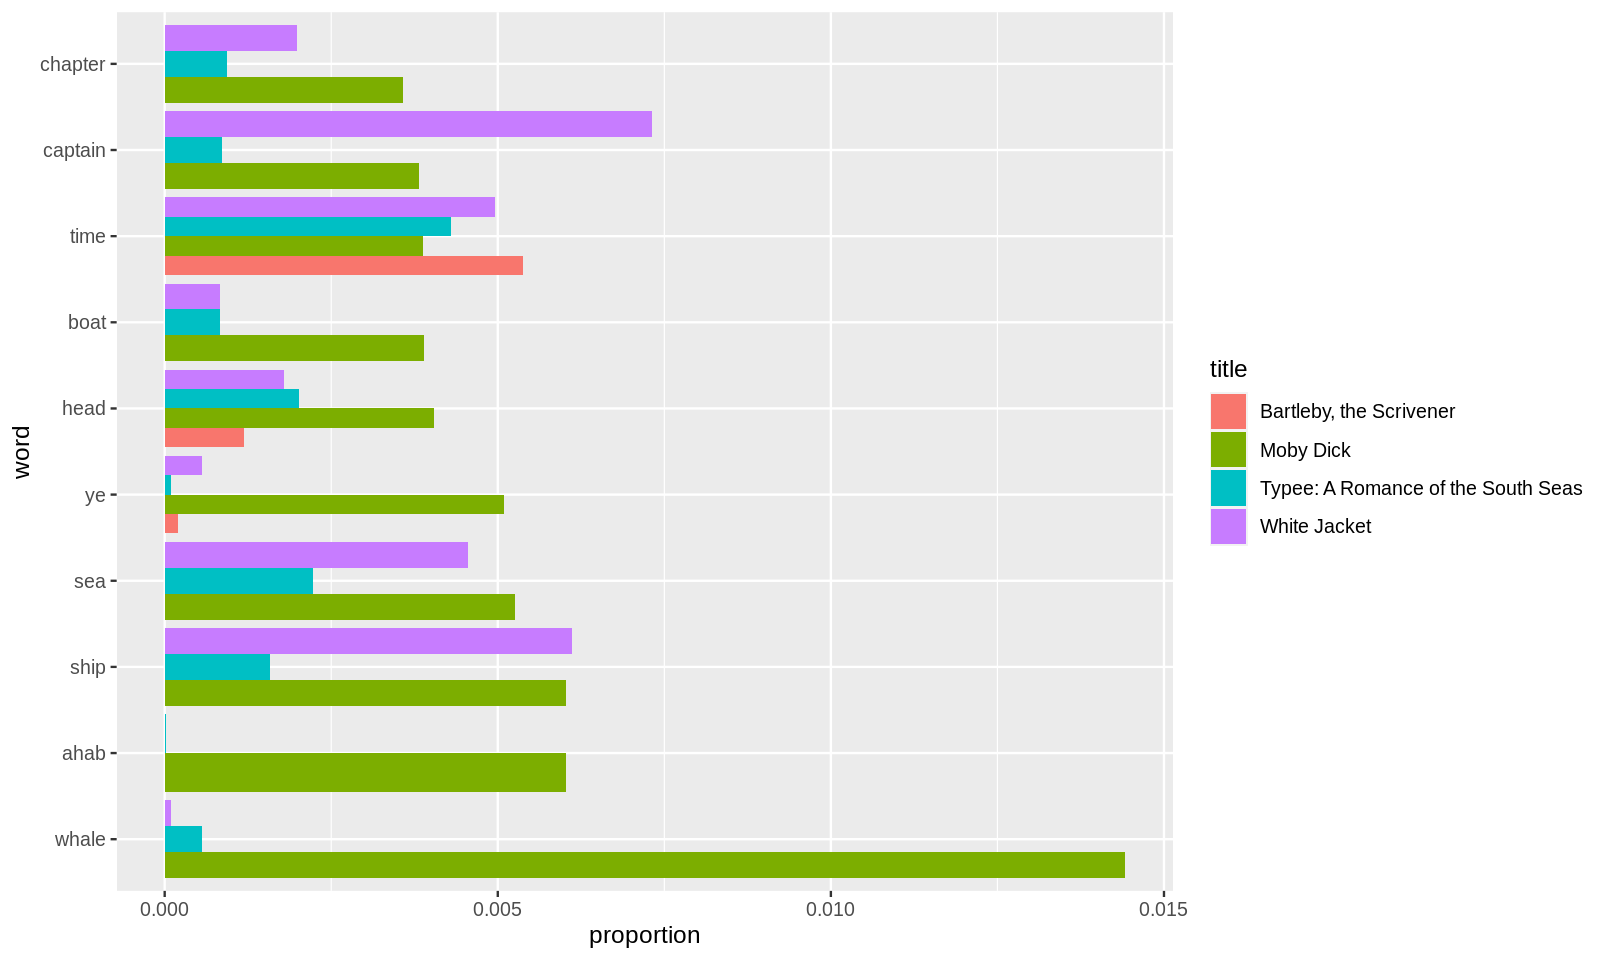

In [33]:
ggplot(top_moby_words_other_texts) + 
  geom_bar(aes(x=proportion, 
               y=factor(word, level=top_moby$word), fill=title), 
           position="dodge",stat="identity") +
  labs(y="word")

## 4. Break

## 5. Sentiment analysis

In this last segment of the workshop we turn to an advanced text analysis technique called *sentiment analysis*. Mining sentiment from text can be useful because it provides a lens for understanding attitudes and opinions expressed through text. 

To demonstrate sentiment analysis we will continue with our tidied Melville corpus developed earlier in the workshop. However, we will amend our pipeline to include an additional step: 

* __(new)__ Create a column giving the line number for each line in the text, 
* Convert the text to a *one-token-per-row* structure, 
* Filter stopwords from the text using the standard `stop_words` list, 
* Enforce that all tokens that appear are strictly alphabetical and lowercase. 

In [34]:
tidy_melville <- melville |>
  group_by(title) |> 
  mutate(linenumber = row_number()) |>
  ungroup() |>
  unnest_tokens(word, text) |>
  anti_join(stop_words) |>
  mutate(word = str_extract(word, "[a-z]+"))

Joining with `by = join_by(word)`


As before, the tidied corpus is available in `tidy_melville`. Note the column `linenumber` containing the corresponding line number for each word in the text. 

In [35]:
tidy_melville

gutenberg_id,title,linenumber,word
<int>,<chr>,<int>,<chr>
15,Moby Dick,1,moby
15,Moby Dick,1,dick
15,Moby Dick,5,whale
15,Moby Dick,7,herman
15,Moby Dick,7,melville
15,Moby Dick,10,contents
15,Moby Dick,12,etymology
15,Moby Dick,13,extracts
⋮,⋮,⋮,⋮


There are many methods available for performing sentiment analysis. In this workshop we will look at one way that mines the total sentiment of a piece of text by adding up the individual sentiment scores for each word in the text. These "individual scores" are given by some sentiment lexicon, e.g, the word `happy` is assigned a `positive` sentiment. 

Because the approach depends on the use of a dictionary, we call this a *dictionary-based method* for sentiment analysis. It is an often-used approach in text analysis and also an approach that naturally takes advantage of the tidy ecosystem. 

Let us look at some sentiment lexicons that are available in the `tidytext` package. 

### 5.1 Sentiment lexicons

The `tidytext` package makes several sentiment lexicons available. We will have a look at three of them: `bing`, `afinn`, and `nrc`. We will be using these throughout the remainder of the workshop.

* `AFINN` from [Finn Årup Nielsen](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010),
* `bing` from [Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), and
* `nrc` from [Saif Mohammad and Peter Turney](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm).

A sentiment lexicon can be retrieved as a *tibble* using the `get_sentiments()` function. Here are some examples: 

In [36]:
get_sentiments("bing")

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
⋮,⋮


In [37]:
# NOTE: By running this cell, you are agreeing to the license that the AFINN 
# lexicon is distributed under. 
get_sentiments("afinn") 

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
⋮,⋮


In [38]:
# NOTE: By running this cell, you are agreeing to the license that the NRC 
# lexicon is distributed under. 
get_sentiments("nrc") 

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
⋮,⋮


Before applying these sentiment lexicons, an asterisk is required here. These sentiment lexicons were not crafted specifically for use in literary analysis directly so applying these dictionaries to a rich literary corpus like our workshop Melville corpus may give less accurate results than when applied to, say, a corpus of contemporary tweets or newswire articles. Notwithstanding this, we can still measure the sentiment content for words that are shared across the lexicon and the text.   

### 5.2 Mining sentiment via an inner join operation

Let us use the Bing sentiment lexicon for this next step. 

In [39]:
bing <- get_sentiments("bing")
bing

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
⋮,⋮


And here is our tidied corpus:

In [40]:
tidy_melville

gutenberg_id,title,linenumber,word
<int>,<chr>,<int>,<chr>
15,Moby Dick,1,moby
15,Moby Dick,1,dick
15,Moby Dick,5,whale
15,Moby Dick,7,herman
15,Moby Dick,7,melville
15,Moby Dick,10,contents
15,Moby Dick,12,etymology
15,Moby Dick,13,extracts
⋮,⋮,⋮,⋮


With our Melville corpus in a tidy format, sentiment analysis boils down to an inner join operation using the `dplyr` package. Just as stopword elimination is an *anti join* operation, sentiment analysis is an *inner join* operation. 

<center>
<img width="40%" src="https://datasciencebox.org/course-materials/_slides/u2-d08-multi-df/img/inner-join.gif"/>
</center>

Let us use this technique to build a list of the top "positive" words in *Moby Dick*, one of the works in our `tidy_melville` collection. First, we will collect all positive sentiment words from the dictionary. 

In [41]:
bing_positive <- get_sentiments("bing") |>
    filter(sentiment == "positive")

Then we can select all rows corresponding to *Moby Dick* and apply the inner join. 

In [43]:
moby_with_sentiment <- tidy_melville |>
    filter(title == "Moby Dick") |>
    inner_join(bing_positive)
moby_with_sentiment

Joining with `by = join_by(word)`


gutenberg_id,title,linenumber,word,sentiment
<int>,<chr>,<int>,<chr>,<chr>
15,Moby Dick,36,merry,positive
15,Moby Dick,38,advocate,positive
15,Moby Dick,96,honor,positive
15,Moby Dick,96,glory,positive
15,Moby Dick,101,grand,positive
15,Moby Dick,103,fast,positive
15,Moby Dick,145,delight,positive
15,Moby Dick,163,loved,positive
⋮,⋮,⋮,⋮,⋮


What are the most popular words used in *Moby Dick* that have positive sentiment?

In [44]:
moby_with_sentiment |>
    count(word, sort = TRUE)

word,n
<chr>,<int>
top,70
fast,64
fine,59
grand,55
heaven,51
mighty,47
noble,44
sharp,43
⋮,⋮


__Exercise:__ How can we tweak the above code to produce a list of the top *negative* sentiment words used in *Bartleby, the Scrivener*? 

In [ ]:
# Your code here!

### 5.3 How does sentiment change throughout a novel?

Let us now examine how sentiment changes throughout each of the novels in our workshop corpus. 

To do this, we will group up segments of the text (say, lines 1 through 80 is the first group, lines 81 to 160 is a second group, and so on..) and count up how many positive and negative words are in each group. 

We define a new column `index` to keep track of where we are in the narrative; this index (using integer division) counts up sections of 80 lines of text.

In [46]:
tidy_melville_sections <- tidy_melville |>
  group_by(title) |>
  mutate(index = linenumber %/% 80) |>
  ungroup()
tidy_melville_sections

gutenberg_id,title,linenumber,word,index
<int>,<chr>,<int>,<chr>,<dbl>
15,Moby Dick,1,moby,0
15,Moby Dick,1,dick,0
15,Moby Dick,5,whale,0
15,Moby Dick,7,herman,0
15,Moby Dick,7,melville,0
15,Moby Dick,10,contents,0
15,Moby Dick,12,etymology,0
15,Moby Dick,13,extracts,0
⋮,⋮,⋮,⋮,⋮


In this next step, we perform sentiment analysis by applying the inner join operation with the Bing lexicon and count up the number of positive and negative words in each 80-line segment. We then apply some `dplyr` functions to create a `sentiment` column that gives the net sentiment score in each 80-line segment. 

In [51]:
melville_sections_sentiment <- tidy_melville_sections |>
  inner_join(bing) |>
  count(title, index, sentiment) |> 
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) |>
  mutate(sentiment = positive - negative)
melville_sections_sentiment

Joining with `by = join_by(word)`
Warning message in inner_join(tidy_melville_sections, bing):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 25876 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


title,index,negative,positive,sentiment
<chr>,<dbl>,<int>,<int>,<int>
"Bartleby, the Scrivener",0,22,26,4
"Bartleby, the Scrivener",1,39,17,-22
"Bartleby, the Scrivener",2,30,27,-3
"Bartleby, the Scrivener",3,24,18,-6
"Bartleby, the Scrivener",4,18,20,2
"Bartleby, the Scrivener",5,30,19,-11
"Bartleby, the Scrivener",6,20,18,-2
"Bartleby, the Scrivener",7,21,24,3
⋮,⋮,⋮,⋮,⋮


Looks great! This tibble lends itself well to a bar plot visualization using `ggplot2`.

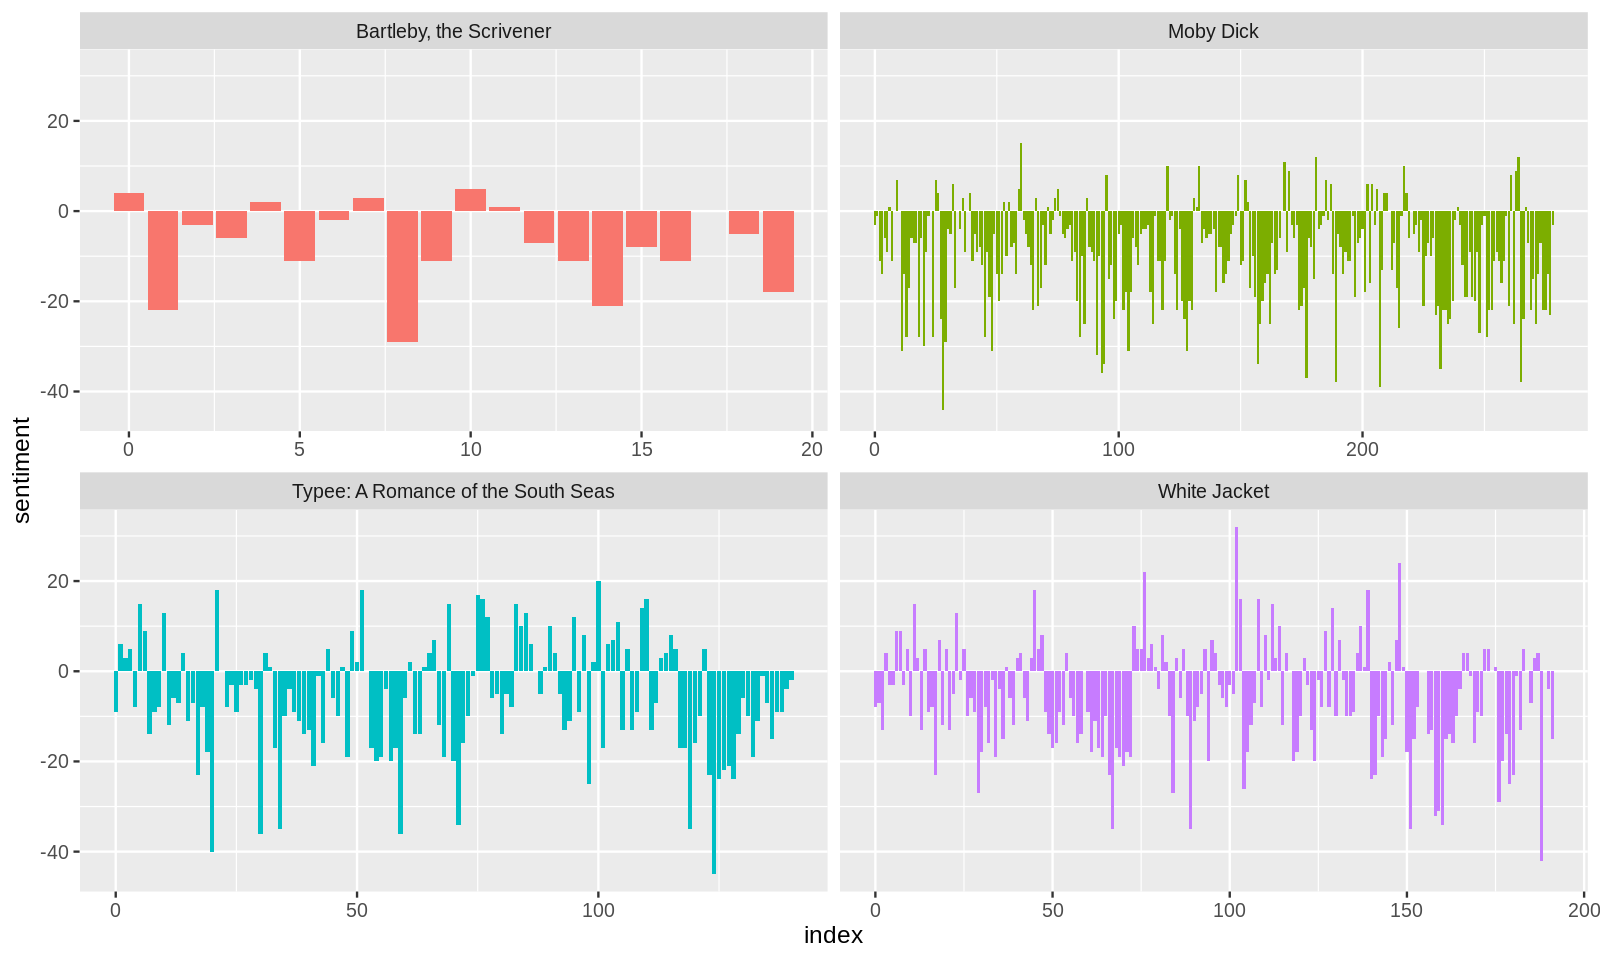

In [52]:
ggplot(melville_sections_sentiment, 
       aes(x = index, 
           y = sentiment, 
           fill = title)) +
  geom_bar(stat = "identity", 
           show.legend = FALSE) +
  facet_wrap(~title, 
             ncol = 2, 
             scales = "free_x")

We can see how the plot of each novel changes sentiment content over the course of the story.

__Exercise:__ We defined a "segment" to be a length of text that spans 80 lines. This may or may not be appropriate depending on the corpus. Modify the above code to use a smaller/larger segment size. Does your choice influence the shape of the above bar plot or does it more or less look the same? 

In [ ]:
# Your code here!

### 5.4 Visualizing words with high contribution to sentiment 

We can use sentiment analysis to visualize words that contribute the most to sentiment in the Melville corpus. Let us apply the inner join operation again and then count up the number of times each word (now annotated with its polarity) appears. We will store the results in a tibble called `bing_word_counts`.

In [61]:
bing_word_counts <- tidy_melville |>
  inner_join(bing) |>
  count(word, sentiment, sort = TRUE) |>
  ungroup()
bing_word_counts

Joining with `by = join_by(word)`
Warning message in inner_join(tidy_melville, bing):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 25876 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


word,sentiment,n
<chr>,<chr>,<int>
top,positive,302
poor,negative,210
strange,negative,186
death,negative,172
fine,positive,161
hard,negative,154
dead,negative,151
master,positive,147
⋮,⋮,⋮


Let us use a bar plot visualization and look at separately the top 10 highest contributing words to negative and positive sentiment. 

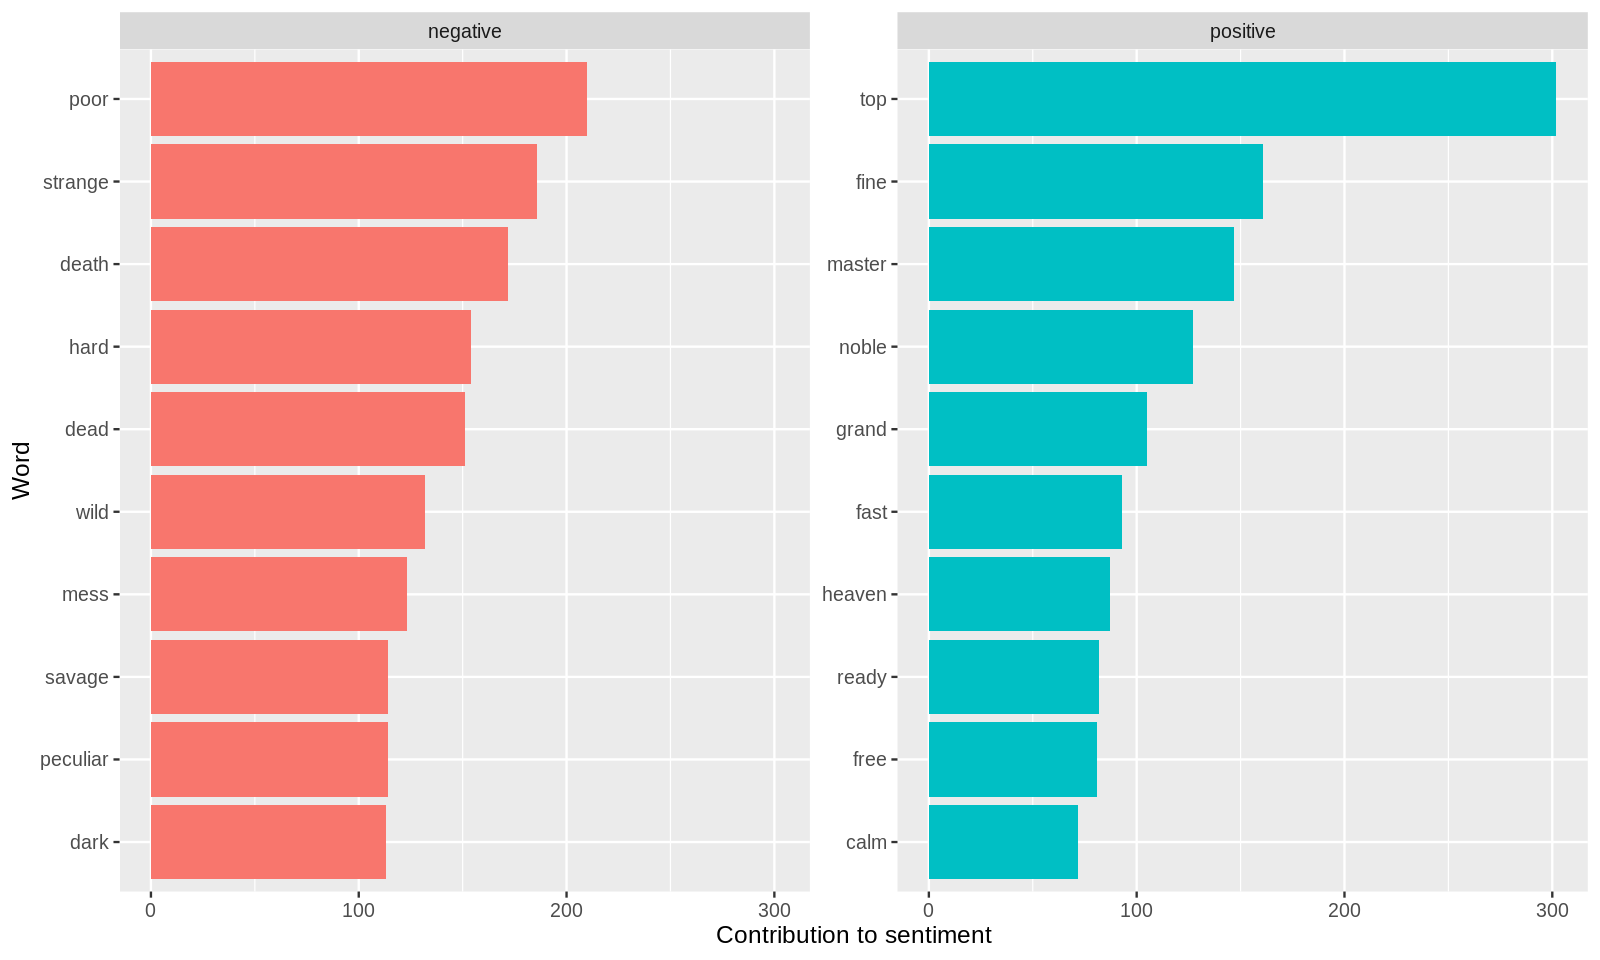

In [64]:
bing_word_counts |>
  group_by(sentiment) |>
  slice_max(n, n = 10) |>
  ungroup() |>
  mutate(word = reorder(word, n)) |>
  ggplot(aes(x = n, y = word, fill = sentiment)) +
  geom_bar(stat = "identity", 
           show.legend = FALSE) + 
  facet_wrap(~sentiment, scales = "free_y") + 
  labs(x = "Contribution to sentiment", y = "Word")

We may object that some words like "peculiar" and "top" are more neutral than they are positive or negative, especially when given its context. To overcome this, we can create a custom stopwords list and substitute the standard list used in the above steps for this list instead so that these noise words no longer appear on the plot.  

__Exercise #1:__ The above visualization shows the top 10 words that contribute most to positive and negative sentiment. How can we tweak the visualization to show instead the top 20 words? 

In [ ]:
# Your code here!

__Exercise #2:__ The above visualization shows the words over the entire Melville corpus that contribute the most to sentiment. What would we need to modify in order to show the same visualization but only for one of the works, say, *Moby Dick*?  

In [ ]:
# Your code here!

### 5.5 Word cloud visualization 

We can also use a word cloud visualization to look at the most important positive and negative words. The `wordcloud` package gives a way to generate a word cloud using base R graphics. 

Here is how we can generate a word cloud of the top words in the Melville corpus using the function `wordcloud()`. Note that because this word cloud is generated using raw word counts, the visualization will favor words used in longer works, like *Moby Dick*.

Joining with `by = join_by(word)`


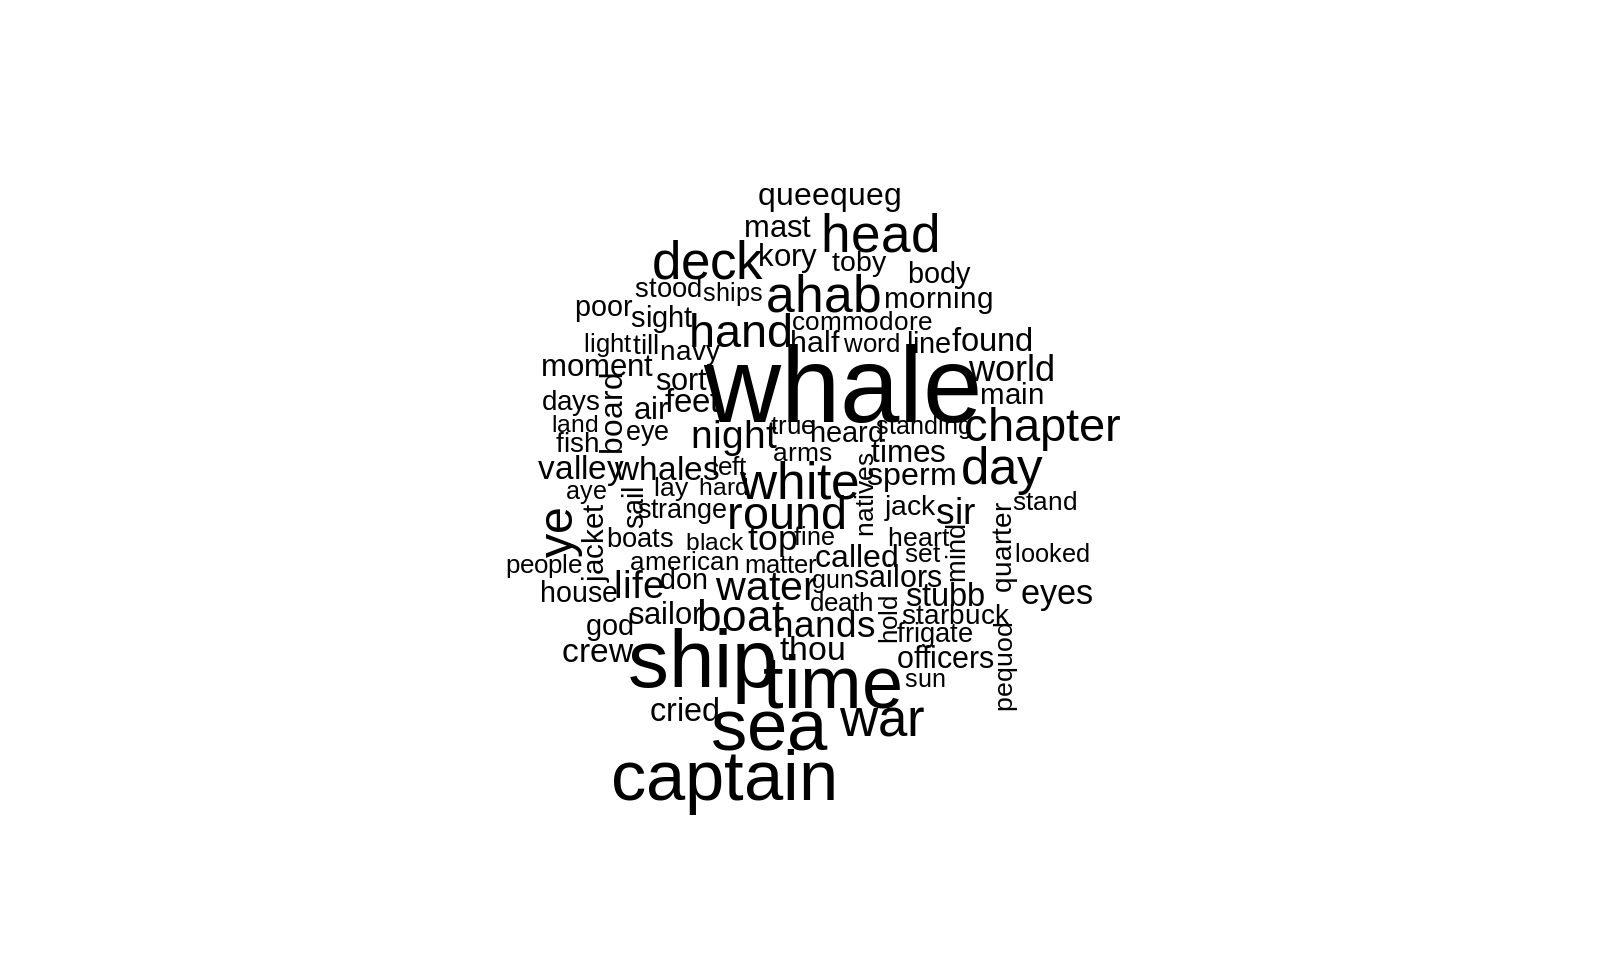

In [66]:
tidy_melville |>
  anti_join(stop_words) |>
  count(word) |>
  with(wordcloud(word, n, max.words = 100))

Here is how we can generate a word cloud annotated with sentiment using the function `comparison.cloud()`. An intermediary step is necessary before the function can be called in which we convert the tibble into a matrix data structure. 

Joining with `by = join_by(word)`
Warning message in inner_join(tidy_melville, get_sentiments("bing")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 25876 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


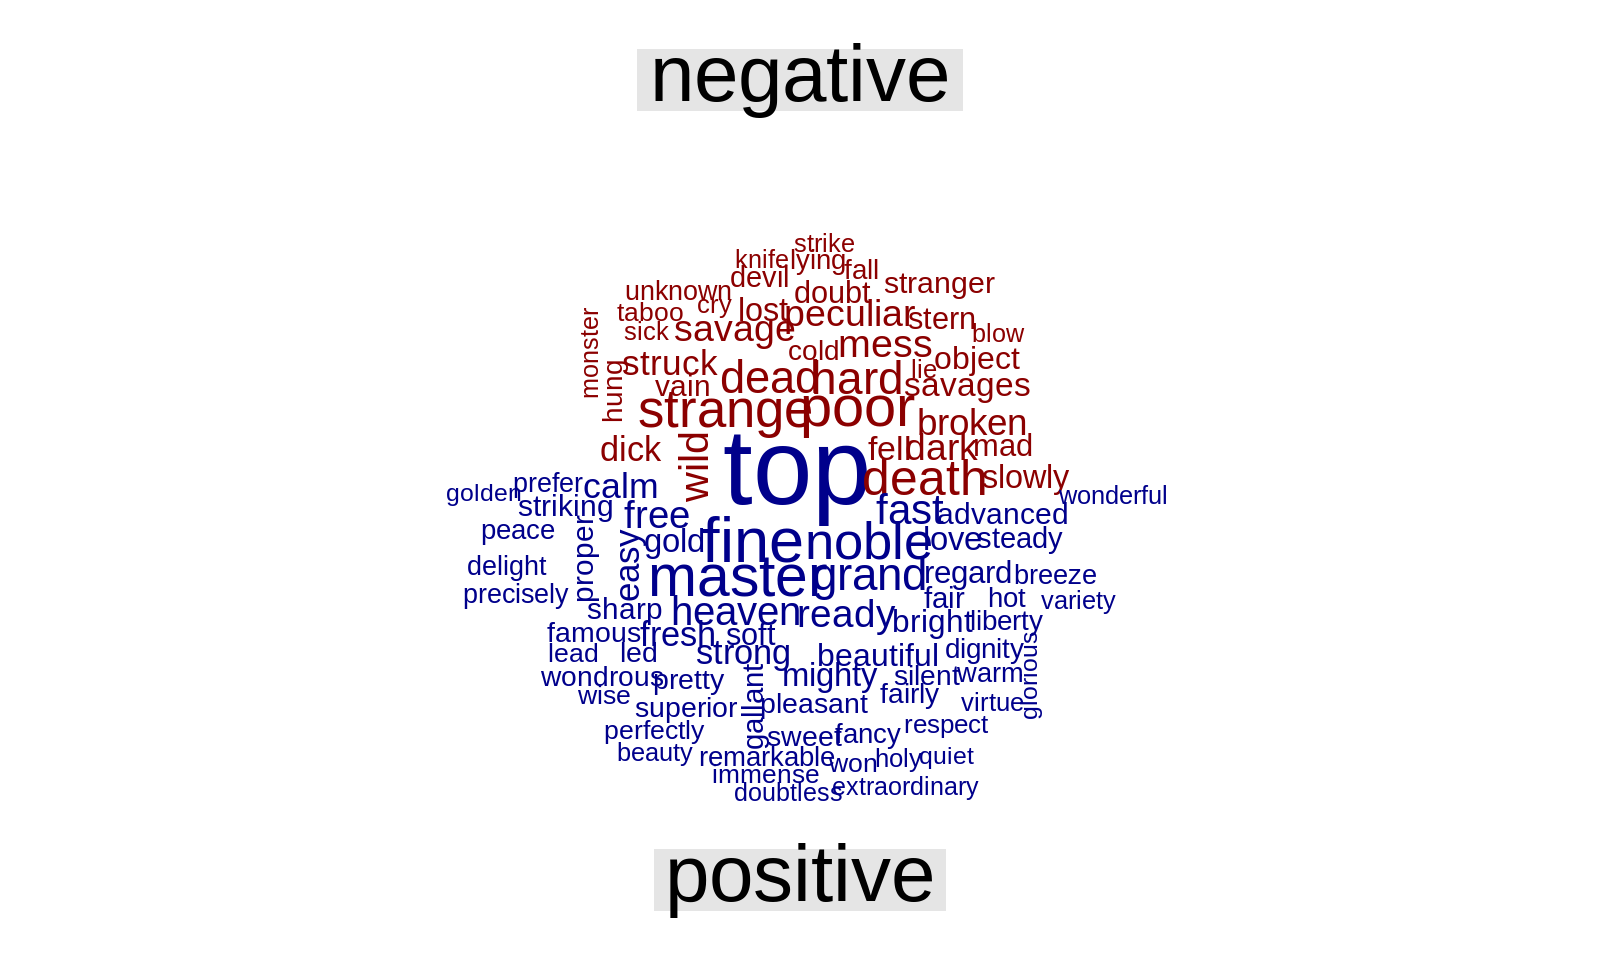

In [69]:
tidy_melville |>
  inner_join(get_sentiments("bing")) |>
  count(word, sentiment, sort = TRUE) |>
  acast(word ~ sentiment, value.var = "n", fill = 0) |> # need to convert to a matrix 
  comparison.cloud(colors = c("darkred", "darkblue"),
                   max.words = 100)

Note that the size of the word's text is proportional to its frequency within its sentiment. The visualization can be used to see the most important positive and negative words, but the size of words is not comparable across polarity. 

__Exercise:__ Tweak the above visualizations so that they show more/less words in the cloud! ☁️

In [ ]:
# Your code here!

### 5.6 Limitations: sentiment lexicon usage

In these last two subsections we turn to important limitations to be aware of when performing sentiment analysis using the methods described so far. 

An inherent limitation in using a dictionary-based method for sentiment analysis is that the choice of sentiment lexicon becomes important. The word contributions produced is given directly by the sentiment values in the dictionary and, should a dictionary be used in an improper context, the contribution values generated will be necessarily influenced as well. 

To develop a better sense of what this means in practice, let us apply two lexicons, Bing and NRC, and compare the overall sentiment scores over the trajectory of *Moby Dick*. We will not need to write much new code to evaluate this; most of the work will be carrying over what we did in Section 5.3. 

Here are the two lexicons we will be comparing:

In [70]:
bing

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
⋮,⋮


In [72]:
nrc <- get_sentiments("nrc")
nrc

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
⋮,⋮


The NRC lexicon supplies different axes of polarity, but we are only interested in "positive" and "negative". Let us filter the dataset to include just these two polarities. The new lexicon will be available in the name `nrc_positive_negative`. 

In [73]:
nrc_positive_negative <- nrc |>
  filter(sentiment %in% c("positive", "negative"))
nrc_positive_negative

word,sentiment
<chr>,<chr>
abandon,negative
abandoned,negative
abandonment,negative
abba,positive
abduction,negative
aberrant,negative
aberration,negative
abhor,negative
⋮,⋮


Let us now filter our `tidy_melville` corpus to include only rows pertaining to `Moby Dick`.

In [74]:
moby_dick <- tidy_melville |>
  filter(title == "Moby Dick")
moby_dick

gutenberg_id,title,linenumber,word
<int>,<chr>,<int>,<chr>
15,Moby Dick,1,moby
15,Moby Dick,1,dick
15,Moby Dick,5,whale
15,Moby Dick,7,herman
15,Moby Dick,7,melville
15,Moby Dick,10,contents
15,Moby Dick,12,etymology
15,Moby Dick,13,extracts
⋮,⋮,⋮,⋮


We will now perform the inner join separately for the two lexicons and then combine the results together by stacking one dataset atop the other using `bind_rows()`. In the combined dataset, we repeat the step of grouping up lines into 80-line segments and then compute the net sentiment score for each segment (ditto Section 5.3).

In [75]:
moby_bing <- moby_dick |>
  inner_join(get_sentiments("bing")) |>
  mutate(method = "Bing et al.")

moby_nrc <- moby_dick |>
  inner_join(nrc_positive_negative) |> 
  mutate(method = "NRC")

moby_together <- bind_rows(moby_bing, moby_nrc) |>
  count(method, index = linenumber %/% 80, sentiment) |>
  pivot_wider(names_from = sentiment,
              values_from = n,
              values_fill = 0) |> 
  mutate(sentiment = positive - negative)
moby_together

Joining with `by = join_by(word)`
Warning message in inner_join(moby_dick, get_sentiments("bing")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 25876 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”
Joining with `by = join_by(word)`
Warning message in inner_join(moby_dick, nrc_positive_negative):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 573 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


method,index,negative,positive,sentiment
<chr>,<dbl>,<int>,<int>,<int>
Bing et al.,0,5,2,-3
Bing et al.,1,6,5,-1
Bing et al.,2,22,11,-11
Bing et al.,3,26,12,-14
Bing et al.,4,15,9,-6
Bing et al.,5,18,9,-9
Bing et al.,6,13,14,1
Bing et al.,7,17,6,-11
⋮,⋮,⋮,⋮,⋮


We will visualize this tibble using the same bar plot we used in Section 5.3. 

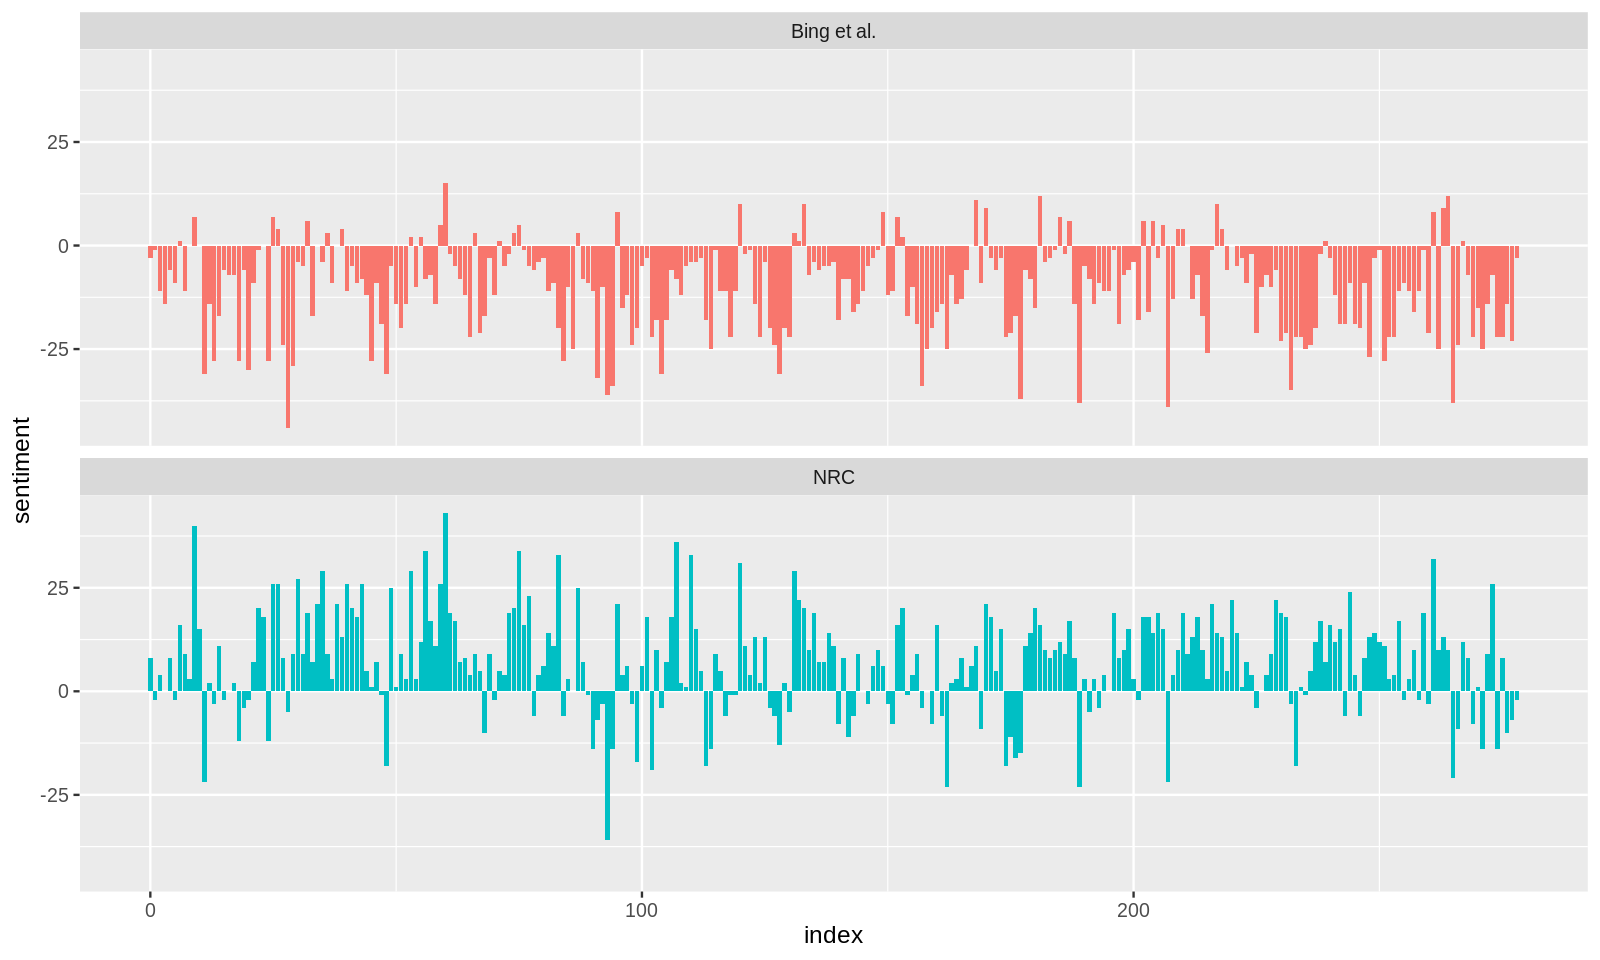

In [77]:
moby_together |>
  ggplot(aes(x = index, y  = sentiment, fill = method)) +
  geom_bar(stat = "identity", 
           show.legend = FALSE) +
  facet_wrap(~method, ncol = 1)

At first glance, the results appear quite different! Indeed, if taken at face value, it would seem that *Moby Dick* is an adventure full of cheer and joy according to the NRC lexicon and a story marked by darkness and serious contemplation according to Bing et al. Which one is right? 

While an interpretative analysis of these results is beyond the scope of this workshop, there are two important technical details that merit discussion before proceeding to a close reading. 

1. While many segments change polarity across lexicon, segments with very high positive or negative sentiment content tend to maintain its polarity. Therefore, if the purpose of the sentiment analysis is to discover portions of the text with high sentiment content, a first step can be to focus on those segments that are not highly sensitive to the lexicon used.
2. Pay attention to the distribution of positive and negative sentiment words in the lexicon. If the polarity of the dictionary is biased in some direction, the results will necessarily be influenced as well. 

We can evaluate #2 by using the `count()` function on the two sentiment lexicons. 

In [78]:
nrc_positive_negative |>
 count(sentiment) |>
 mutate(prop = n / sum(n))

sentiment,n,prop
<chr>,<int>,<dbl>
negative,3316,0.5896159
positive,2308,0.4103841


In [79]:
bing |> 
  count(sentiment) |>
  mutate(prop = n / sum(n))

sentiment,n,prop
<chr>,<int>,<dbl>
negative,4781,0.7045388
positive,2005,0.2954612


### 5.7 Limitations: negated text

Dictionary-based methods do not take into account qualifiers before words so the appearence of phrases like "without success" or "cannot love" can lead to passages being labeled positive when really they are not. The effect of this depends on whether the corpus contains large sections of negated text. Nevertheless, we can evaluate what kind of negation words are important in a given text. 

Let us use the `afinn` sentiment lexicon for this exploration:

In [80]:
afinn <- get_sentiments("afinn")
afinn

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
⋮,⋮


Let us consider the following qualifier words:

In [81]:
negate_words <- c("not", "without", "no", "cannot", "dont")

To understand the effect, we will need to extract phrases (two-word units) from the Melville corpus. These are often called *bigrams*, or *n-grams* where $n=2$. The `unnest_tokens()` function can still be used for this purpose with the addition of two arguments, as follows: 

In [84]:
melville_bigrams <- melville |>
 unnest_tokens(bigram, text, token = "ngrams", n = 2) |>
 drop_na() |>
 mutate(bigram = str_remove(bigram, "[^a-z ]")) # deal with single quotes in words like "don't" 
melville_bigrams

gutenberg_id,title,bigram
<int>,<chr>,<chr>
15,Moby Dick,moby dick
15,Moby Dick,the whale
15,Moby Dick,by herman
15,Moby Dick,herman melville
15,Moby Dick,chapter i
15,Moby Dick,i loomings
15,Moby Dick,chapter ii
15,Moby Dick,ii the
⋮,⋮,⋮


We can build a frequency table of these bigrams. 

In [85]:
melville_bigram_counts <- melville_bigrams |>
  count(title, bigram, sort = TRUE) |>
  separate(bigram, c("word1", "word2"), sep = " ")
melville_bigram_counts

title,word1,word2,n
<chr>,<chr>,<chr>,<int>
Moby Dick,of,the,1770
White Jacket,of,the,1487
Typee: A Romance of the South Seas,of,the,1467
Moby Dick,in,the,1113
White Jacket,in,the,735
Moby Dick,to,the,701
Typee: A Romance of the South Seas,in,the,624
White Jacket,to,the,581
⋮,⋮,⋮,⋮


Let us focus only on bigrams where the first word is one of the words that appears in `negate_words`. 

In [86]:
melville_bigram_counts_filtered <- melville_bigram_counts |>
  filter(word1 %in% negate_words) |>
  count(word1, word2, wt = n, sort = TRUE)
melville_bigram_counts_filtered

word1,word2,n
<chr>,<chr>,<int>
not,a,166
not,to,152
not,the,106
not,only,82
no,more,73
not,be,72
not,so,65
no,doubt,51
⋮,⋮,⋮


We will annotate this tibble with the sentiment contribution scores:

In [87]:
with_sentiment <- melville_bigram_counts_filtered |>
  inner_join(afinn, by = c(word2 = "word")) |>
  mutate(contribution = value * n)
with_sentiment

word1,word2,n,value,contribution
<chr>,<chr>,<int>,<dbl>,<dbl>
no,doubt,51,-1,-51
no,no,23,-1,-23
not,help,12,2,24
not,avoid,11,-1,-11
dont,like,8,2,16
no,good,7,3,21
no,matter,7,1,7
not,fail,7,-2,-14
⋮,⋮,⋮,⋮,⋮


Here is a bar plot showing the results: 

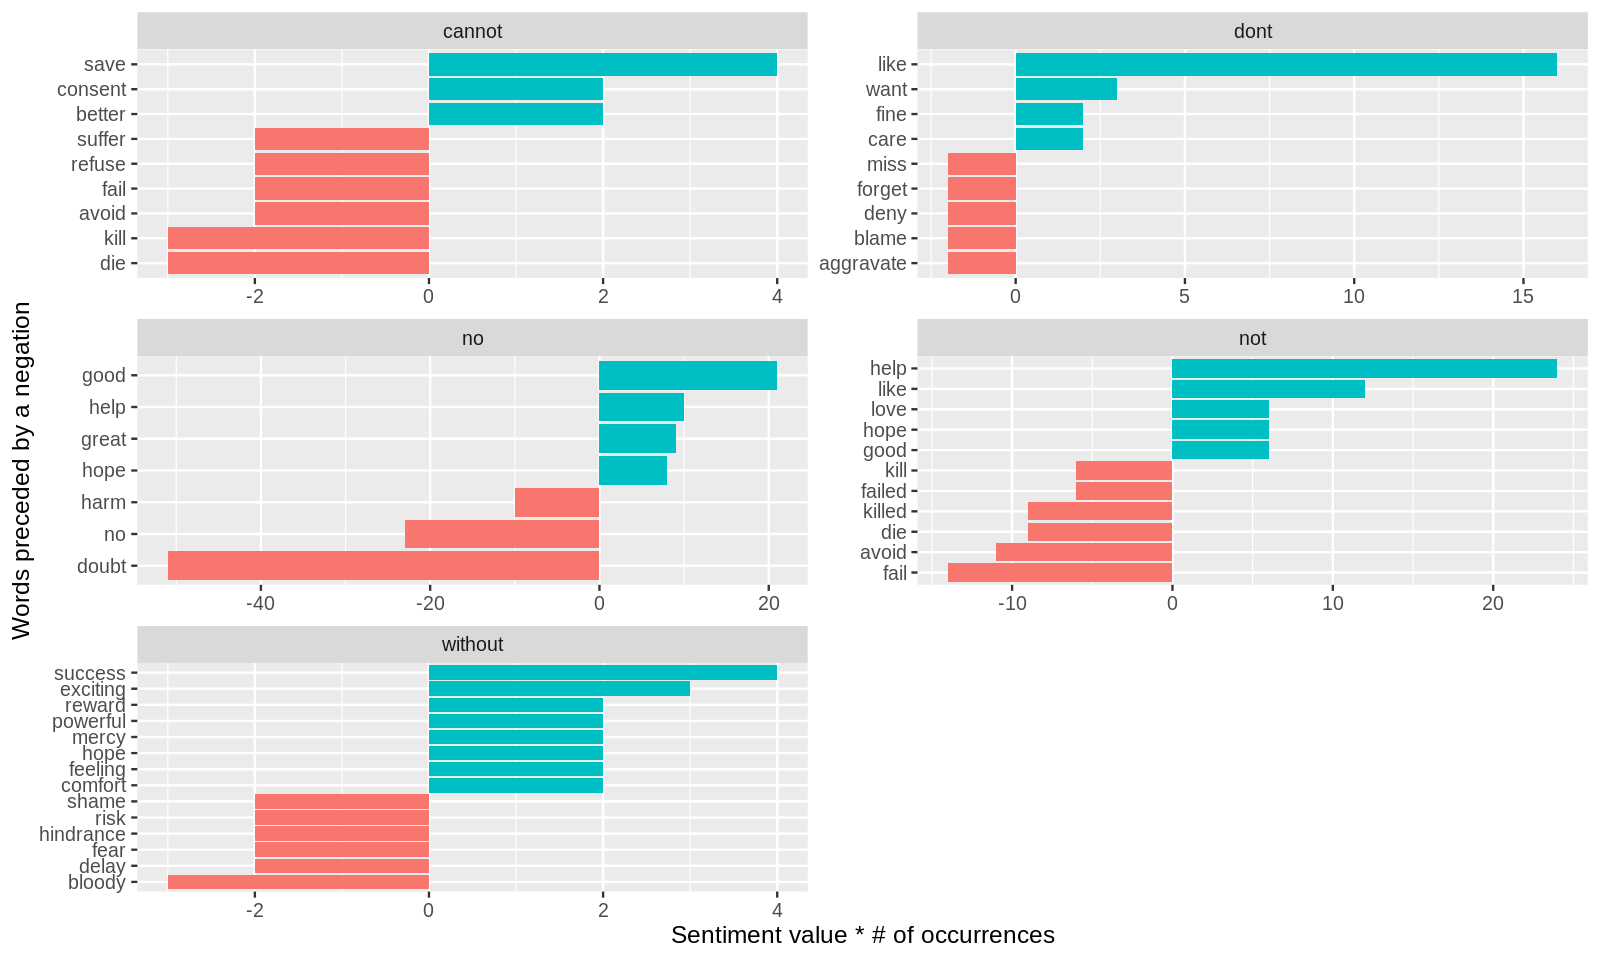

In [96]:
with_sentiment |>
  group_by(word1) |>
  slice_max(abs(contribution), n = 7) |>
  ungroup() |>
  mutate(word2 = reorder_within(word2, contribution, word1)) |>
  ggplot(aes(contribution, word2, fill = contribution > 0)) +
  geom_bar(stat="identity", show.legend = FALSE) +
  facet_wrap(~ word1, scales = "free", nrow = 3) + 
  scale_y_reordered() + 
  labs(x = "Sentiment value * # of occurrences",
       y = "Words preceded by a negation")

## Further reading 

Thank you for your participation in today's workshop! If you are interested in learning more about text analysis in R, and the tidy tool ecosystem for data science more broadly, I suggest bookmarking the following resources. Silge and Robinson's textbook in particular provided an inspiration for many of the examples presented in this workshop. 

* [Text Mining with R](https://www.tidytextmining.com) by Julia Silge and David Robinson
* [Exploring Data Science with R and the Tidyverse: A Concise Introduction](https://ds4world.cs.miami.edu) by Jerry Bonnell and Mitsunori Ogihara 
* [R for Data Science](https://r4ds.had.co.nz) by Hadley Wickham and Garrett Grolemund
